# Apredizado Supervisionado: Classificação c/ Random Forest

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Aquisição de dados

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8) #transforma as labels de string para int

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [5]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
mnist.target.shape

(70000,)

In [8]:
# X,y = mnist.data.values, mnist.target.to_numpy() # Converte para np arrays

X,y = mnist['data'], mnist['target']

In [9]:
X[30000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  4

In [10]:
digito = X[10999].reshape(28,28)

## 2. Visualização dos dados

(-0.5, 27.5, 27.5, -0.5)

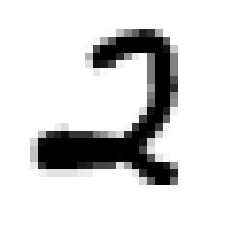

2

In [11]:
plt.imshow(digito, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
y[10999]

## 3. Pré-processamento

In [12]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [13]:
X_test.shape

(10000, 784)

In [14]:
y_test.shape

(10000,)

In [15]:
X_train.shape

(60000, 784)

In [16]:
y_train.shape

(60000,)

In [17]:
index = np.random.permutation(60000)
X_train, y_train = X_train[index], y_train[index]

In [18]:
index = np.random.permutation(10000)
X_test, y_test = X_test[index], y_test[index]

## 5. Ajustando o Modelo

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [33]:
param_grid = { 
    'n_neighbors': [3,5,7],
    'weights' : ['uniform', 'distance'],
    'n_jobs': [-1]
}

In [124]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [125]:
grid_search.fit(X_train, y_train)

c:\users\alexw\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\alexw\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\alexw\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "c:\users\alexw\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\alexw\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(est

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1], 'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [126]:
grid_search.best_params_
grid_search.best_score_

{'n_jobs': -1, 'n_neighbors': 3, 'weights': 'distance'}

0.9734

In [127]:
knn_best = KNeighborsClassifier(n_neighbors= 3, weights= 'distance', n_jobs= -1)
knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [128]:
knn_predictions = knn_best.predict(X_test)

In [129]:
acc = sum(knn_predictions == y_test)/len(knn_predictions)
print(acc)

0.9717


## 6. Avaliando o Modelo

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(knn_predictions,y_test)

0.9717

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn_predictions)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   9,    7,  997,    2,    0,    0,    1,   14,    2,    0],
       [   0,    1,    4,  975,    1,   13,    1,    7,    4,    4],
       [   0,    5,    0,    0,  948,    0,    5,    4,    1,   19],
       [   4,    1,    0,   12,    2,  860,    5,    1,    3,    4],
       [   4,    3,    0,    0,    4,    3,  944,    0,    0,    0],
       [   0,   18,    4,    0,    2,    0,    0,  994,    0,   10],
       [   7,    0,    3,   13,    5,   11,    3,    4,  923,    5],
       [   3,    4,    2,    7,    9,    4,    1,    8,    2,  969]],
      dtype=int64)

### Precision Score

In [133]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, knn_predictions, average='weighted')

0.9718114070609561

### Recall Score

In [134]:
recall_score(y_test, knn_predictions, average='weighted')

0.9717

### F1-score

In [136]:
from sklearn.metrics import f1_score
f1_score(y_test,knn_predictions, average='weighted')

0.9716625082300628

## 2 - Shift()

In [19]:
from scipy.ndimage.interpolation import shift

In [20]:
def show_images(images, titles) -> None:
    n: int = len(images)
    f = plt.figure(figsize=(10, 10))
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')

    plt.show(block=True)

### deslocando com Shift

(28, 28)

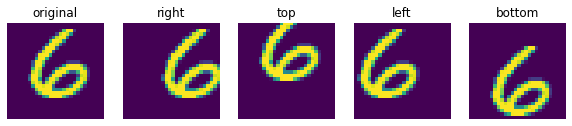

reshape -1:  (784,)
label:  6


In [21]:
index = 7 # uma imagem aleatoria do X_train

img = X_train[index].reshape(28,28) #redimensiona a imgaem para a função shift() funcionar

img.shape

pixels = 5 # quantidade de pixel(s) a ser deslocado (na atividade pede 1pixel)

right = [0,pixels]
top = [-pixels,0]
left =  [0,-pixels]
bottom = [pixels,0]

img_shifted_right = shift(img, right, cval=0, order=0)
img_shifted_top = shift(img, top, cval=0, order=0)
img_shifted_left = shift(img, left, cval=0, order=0)
img_shifted_bottom = shift(img, bottom, cval=0, order=0)

images = [img, img_shifted_right, img_shifted_top, img_shifted_left, img_shifted_bottom]
titles = ['original','right', 'top', 'left', 'bottom']

show_images(images, titles) # funcção para plotar e confirmar o deslocamento

test = img_shifted_right.reshape(-1) # retorna a imagem para a dimensão original (784,)

print('reshape -1: ', test.shape) 

print('label: ',y_train[index])

In [22]:
new_X_train = [[]]*300000
new_y_train = [[]]*300000

In [23]:
def shift_img(img, lb, cont, direction):
    pixels = 5 # quantidade de pixel(s) a ser deslocado

    right = [0,pixels]
    top = [-pixels,0]
    left =  [0,-pixels]
    bottom = [pixels,0]

    if direction == 'right':
        img_shifted_right = shift(img, right, cval=0, order=0) # desloca a quantidade de pixels definida para a direita da imagem
        img_shifted_right = img_shifted_right.reshape(-1)  # retorna a imagem para a dimensão original (784,)
        new_X_train[cont] = img_shifted_right.copy()
        
        
    elif direction == 'left':
        img_shifted_left = shift(img, left, cval=0, order=0) # desloca a quantidade de pixels definida para a esquerda da imagem
        img_shifted_left = img_shifted_left.reshape(-1)
        new_X_train[cont] = img_shifted_left.copy()
        
    
    elif direction == 'top':
        img_shifted_top = shift(img, top, cval=0, order=0) # desloca a quantidade de pixels definida para o topo da imagem
        img_shifted_top = img_shifted_top.reshape(-1)
        new_X_train[cont] = img_shifted_top.copy()
        
    
    elif direction == 'bottom':
        img_shifted_bottom = shift(img, bottom, cval=0, order=0) # desloca a quantidade de pixels definida para a direita
        img_shifted_bottom = img_shifted_bottom.reshape(-1)
        new_X_train[cont] = img_shifted_bottom.copy()
        
    

In [24]:
def main():
    loop = True
    x = 0 # contador do X_train
    cont = 0 # contador da nova base
    c_dir = 0 # contador das direções
    xt = 0 # contador do X_train original
    
    while loop:
        directions = ['right', 'left', 'top', 'bottom']
        
        if x < 60000:
            img = X_train[x].reshape(28,28) # redimensiona a imagem para a função shift() funcionar
            lb = y_train[x]
            
            if cont < 60000:
                shift_img(img, lb, cont, directions[c_dir]) # right
                new_y_train[cont] = lb
                cont+=1
                x+=1
            elif cont >= 60000 and cont < 120000:
                shift_img(img, lb, cont, directions[c_dir]) # left
                new_y_train[cont] = lb
                cont+=1
                x+=1
            elif cont >= 120000 and cont < 180000:
                shift_img(img, lb, cont, directions[c_dir]) # top
                new_y_train[cont] = lb
                cont+=1
                x+=1
            elif cont >= 180000 and cont < 240000:
                shift_img(img, lb, cont, directions[c_dir]) # bottom 
                new_y_train[cont] = lb
                cont+=1
                x+=1
            elif cont >= 240000 and cont < 300000:
                new_X_train[cont] = X_train[xt].copy()
                new_y_train[cont] = lb
                cont+=1
                xt+=1
        else:
            x = 0
            c_dir += 1
        
        if cont >= 300000:
            loop = False # Fim do loop
        

In [25]:
import time

start = time.time()
print('Inicio da execução')

main()

end = time.time()
print('fim da execução')
print(end - start) #s egundos

Inicio da execução
fim da execução
11.303462982177734


In [26]:
new_X_train = np.array(new_X_train)
new_y_train = np.array(new_y_train)

type(new_X_train)
type(new_y_train)

print(new_X_train.shape, new_y_train.shape)
print(X_train.shape, y_train.shape)

numpy.ndarray

numpy.ndarray

(300000, 784) (300000,)
(60000, 784) (60000,)


(-0.5, 27.5, 27.5, -0.5)

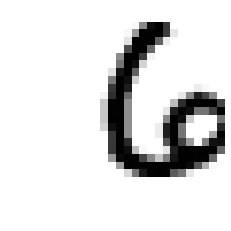

NameError: name 'new_labels' is not defined

In [34]:
num = new_X_train[40400].reshape(28,28)

plt.imshow(num, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
print(new_y_train[40400])

In [35]:
param_grid = { 
    'n_neighbors': [3,5,7],
    'weights' : ['uniform', 'distance'],
    'n_jobs': [-1]
}

In [36]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [37]:
knn_best = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)
knn_best.fit(new_X_train,new_y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [39]:
knn_predictions = knn_best.predict(new_X_train)

KeyboardInterrupt: 

In [ ]:
acc = sum(knn_predictions == y_test)/len(knn_predictions)
print(acc)

### Matriz de confusão

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(knn_predictions,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn_predictions)

### Precision Score

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, knn_predictions, average='weighted')

### Recall Score

In [ ]:
recall_score(y_test, knn_predictions, average='weighted')

### F1-score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,knn_predictions, average='weighted')